In [54]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [55]:
# Load the trained model 
model = torch.load('./NutExp/weights.pt')
# Set the model to evaluate mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [56]:
# Read the log file using pandas into a dataframe
df = pd.read_csv('./NutExp/log.csv')

### Training and testing loss, f1_score and auroc values for the model trained on the CrackForest dataset

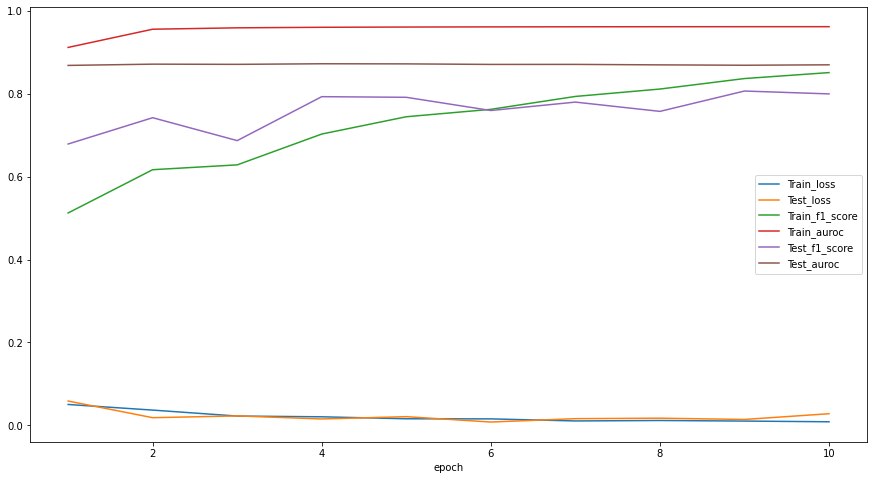

In [58]:
# Plot all the values with respect to the epochs
df.plot(x='epoch',figsize=(15,8));

In [59]:
print(df[['Train_auroc','Test_auroc']].max())

Train_auroc    0.962523
Test_auroc     0.873000
dtype: float64


### Sample Prediction

In [60]:
ino = 2
imgname = 'test16-10-3-Colour.png'
# Read  a sample image and mask from the data-set
img = cv2.imread(f'./NutDataset/Images/' + imgname).transpose(2,0,1).reshape(1,3,240,255)
mask = cv2.imread(f'./NutDataset/Masks/' + imgname)
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255)

(array([13656., 37631.,  1853.,  1104.,   937.,   844.,   900.,   984.,
         1592.,  1699.]),
 array([-0.15314794, -0.03645297,  0.08024199,  0.19693695,  0.31363192,
         0.43032688,  0.54702187,  0.6637168 ,  0.7804118 ,  0.8971067 ,
         1.0138017 ], dtype=float32),
 <BarContainer object of 10 artists>)

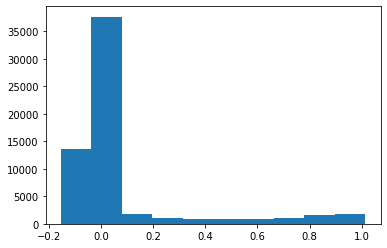

In [61]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a['out'].data.cpu().numpy().flatten())

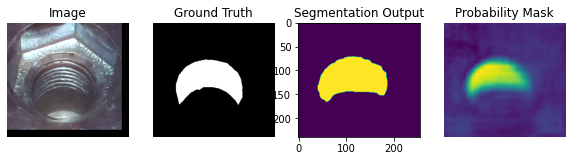

In [68]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(141);
plt.imshow(img[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(142);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(143);
plt.imshow(a['out'].cpu().detach().numpy()[0][0] > .1);
plt.title('Segmentation Output')
plt.subplot(144);
plt.imshow(a['out'].cpu().detach().numpy()[0][0]);
plt.title('Probability Mask')
plt.axis('off');
plt.savefig('./NutExp/SegmentationOutput.png',bbox_inches='tight')